# Coffee Data Analysis and Visualization

## Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
output_notebook()

sns.set(font_scale=1.5)

Loading BokehJS ...

## Clean and prepare the data

In [9]:
#define directory paths

df_paths=[
    "./data/domestic-consumption.csv",
    "./data/exports-calendar-year.csv",
    "./data/exports-crop-year.csv",
    "./data/gross-opening-stocks.csv",
    "./data/total-production.csv"
]

dfs=[pd.read_csv(df_path) for df_path in df_paths]

#define function making mean value of every column and attaching it to country
def get_means(df):
    df=df.copy()
    countries=df[df.columns[0]]
    mean=df.mean(axis=1)
    df=pd.concat([countries,mean],axis=1)
    df.columns=['country',countries.name]
    return df

In [10]:
#define function that creates data frames
def make_df(dfs):
    
    # Process all DataFrames
    processed_dfs = []
    for df in dfs:
        processed_dfs.append(get_means(df))
        
    # Merge DataFrames
    df = processed_dfs[0]
    
    for i in range(1, len(processed_dfs)):
        df = df.merge(processed_dfs[i], on='country')
    
    return df

data=make_df(dfs)

/tmp/ipykernel_21642/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_21642/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_21642/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean=df.mean(axis=1)
/tmp/ipykernel_21642/1234719787.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version thi

In [21]:
##rename columns and output to same csv (already done, doesn't need rerunning)
#df = df.rename(columns={'1990/91': '1990', '1991/92': '1991', '1992/93': '1992', '1993/94': '1993', '1994/95': '1994', '1995/96': '1995', '1996/97': '1996', '1997/98': '1997', '1998/99': '1998', '1999/00': '1999', '2000/01': '2000', '2001/02': '2001', '2002/03': '2002', '2003/04': '2003', '2004/05': '2004', '2005/06': '2005', '2006/07': '2006', '2007/08': '2007', '2008/09': '2008', '2009/10': '2009', '2010/11': '2010', '2011/12': '2011', '2012/13': '2012', '2013/14': '2013', '2014/15': '2014', '2015/16': '2015', '2016/17': '2016', '2017/18': '2017', '2018/19': '2018', '2019/20': '2019'})
#df.to_csv('Domestic_Coffee_Consumption.csv')

#Ensure no null values exist in our data
data.isna().sum() #returns False for all
data = data.dropna()

#Ensure no duplicate rows exist in our data
data.loc[data.duplicated()] #Nothing returned
data = data.drop_duplicates()

#reset data frame and index, sorting by domestic consumption
data = data.sort_values(by='domestic_consumption', ascending=False)
data = data.reset_index(drop=True)
data.head()

,country,domestic_consumption,exports,exports_crop_year,gross_opening_stocks,total_production
0,Brazil,15234.310345,25706.195606,25919.128803,23213.206897,41067.783976
1,Indonesia,2662.137931,5878.047357,5879.061059,690.114655,8452.302438
2,Ethiopia,2529.034483,2257.551574,2326.651490,2044.586207,4880.789417
3,Mexico,1749.517241,3143.855086,3109.249886,598.732759,4376.146438
4,Philippines,1501.310345,29.944000,26.203414,563.620690,501.272379


## Analysis and Visualization

(0.0, 17000.0)

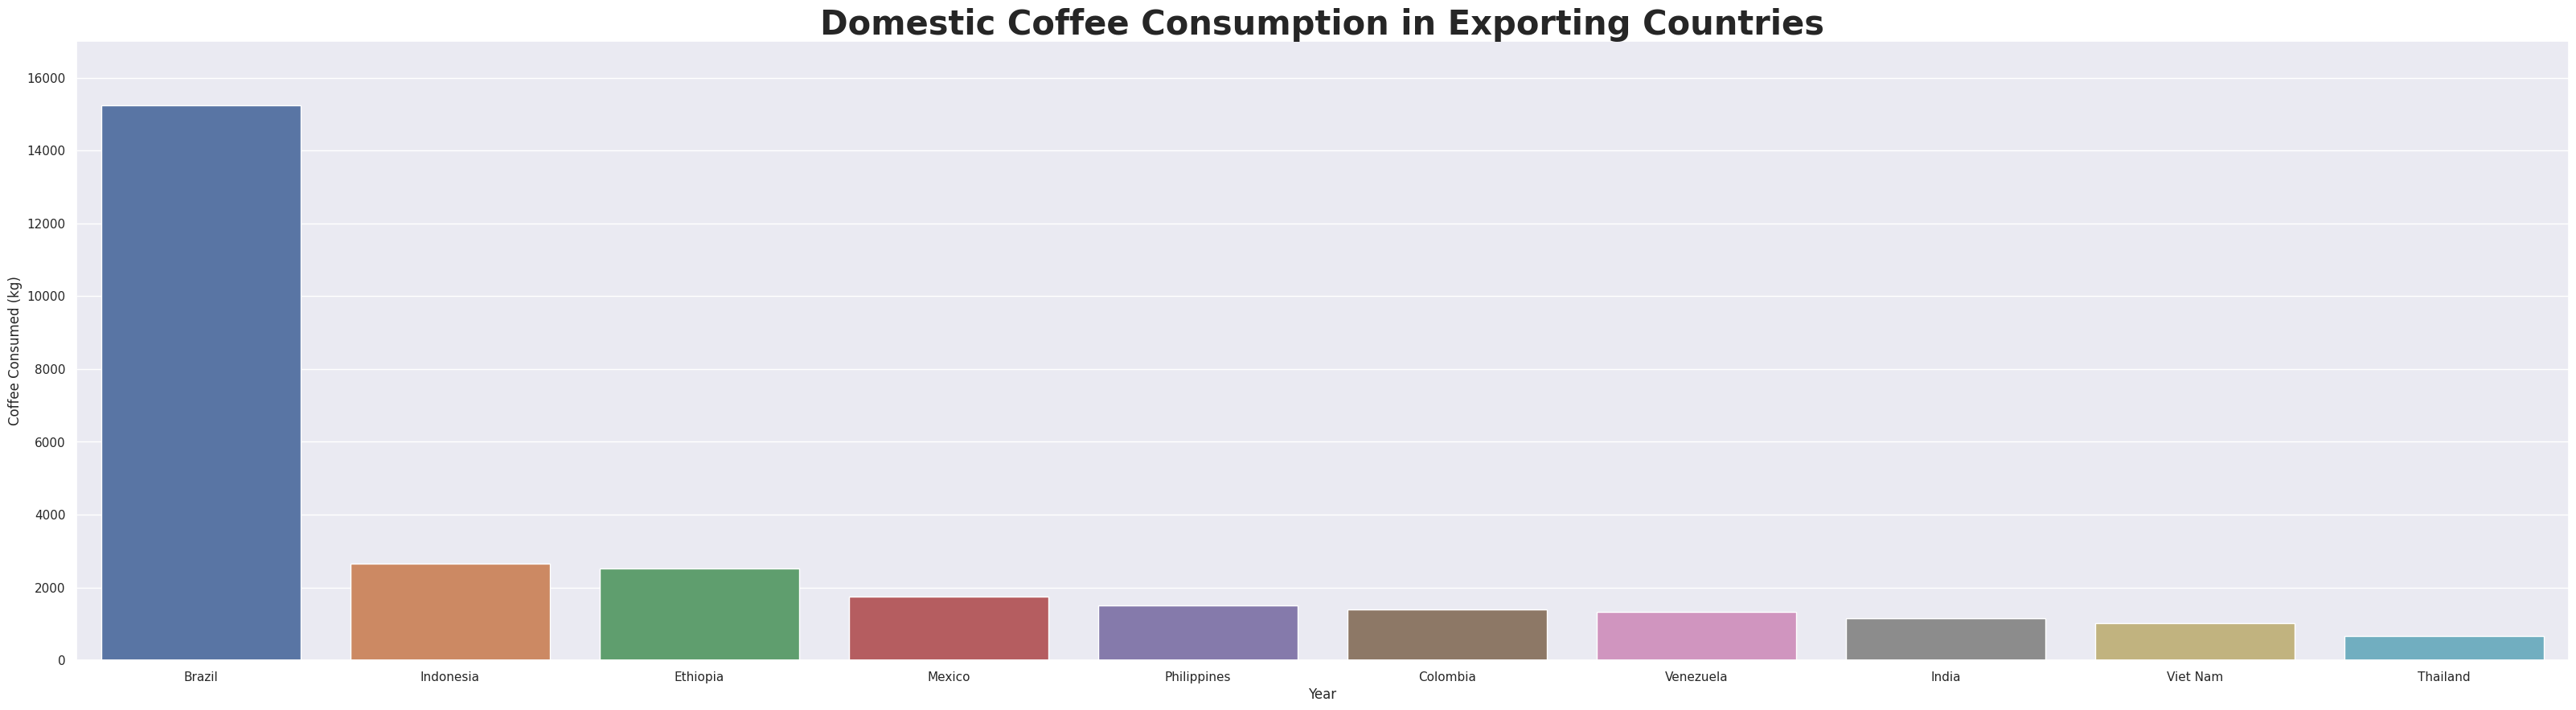

In [22]:
#Create bar graph of top ten Countries by coffee consumption
top_ten_consume = data.head(10)
sns.set(rc={"figure.figsize":(40, 10)})
consume_barplot = sns.barplot(x=top_ten_consume['country'], y = top_ten_consume['domestic_consumption'])
consume_barplot.set_ylabel('Coffee Consumed (kg)')
consume_barplot.set_xlabel('Year')
consume_barplot.set_title('Domestic Coffee Consumption in Exporting Countries', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,17000)
consume_barplot.show()

(0.0, 30000.0)

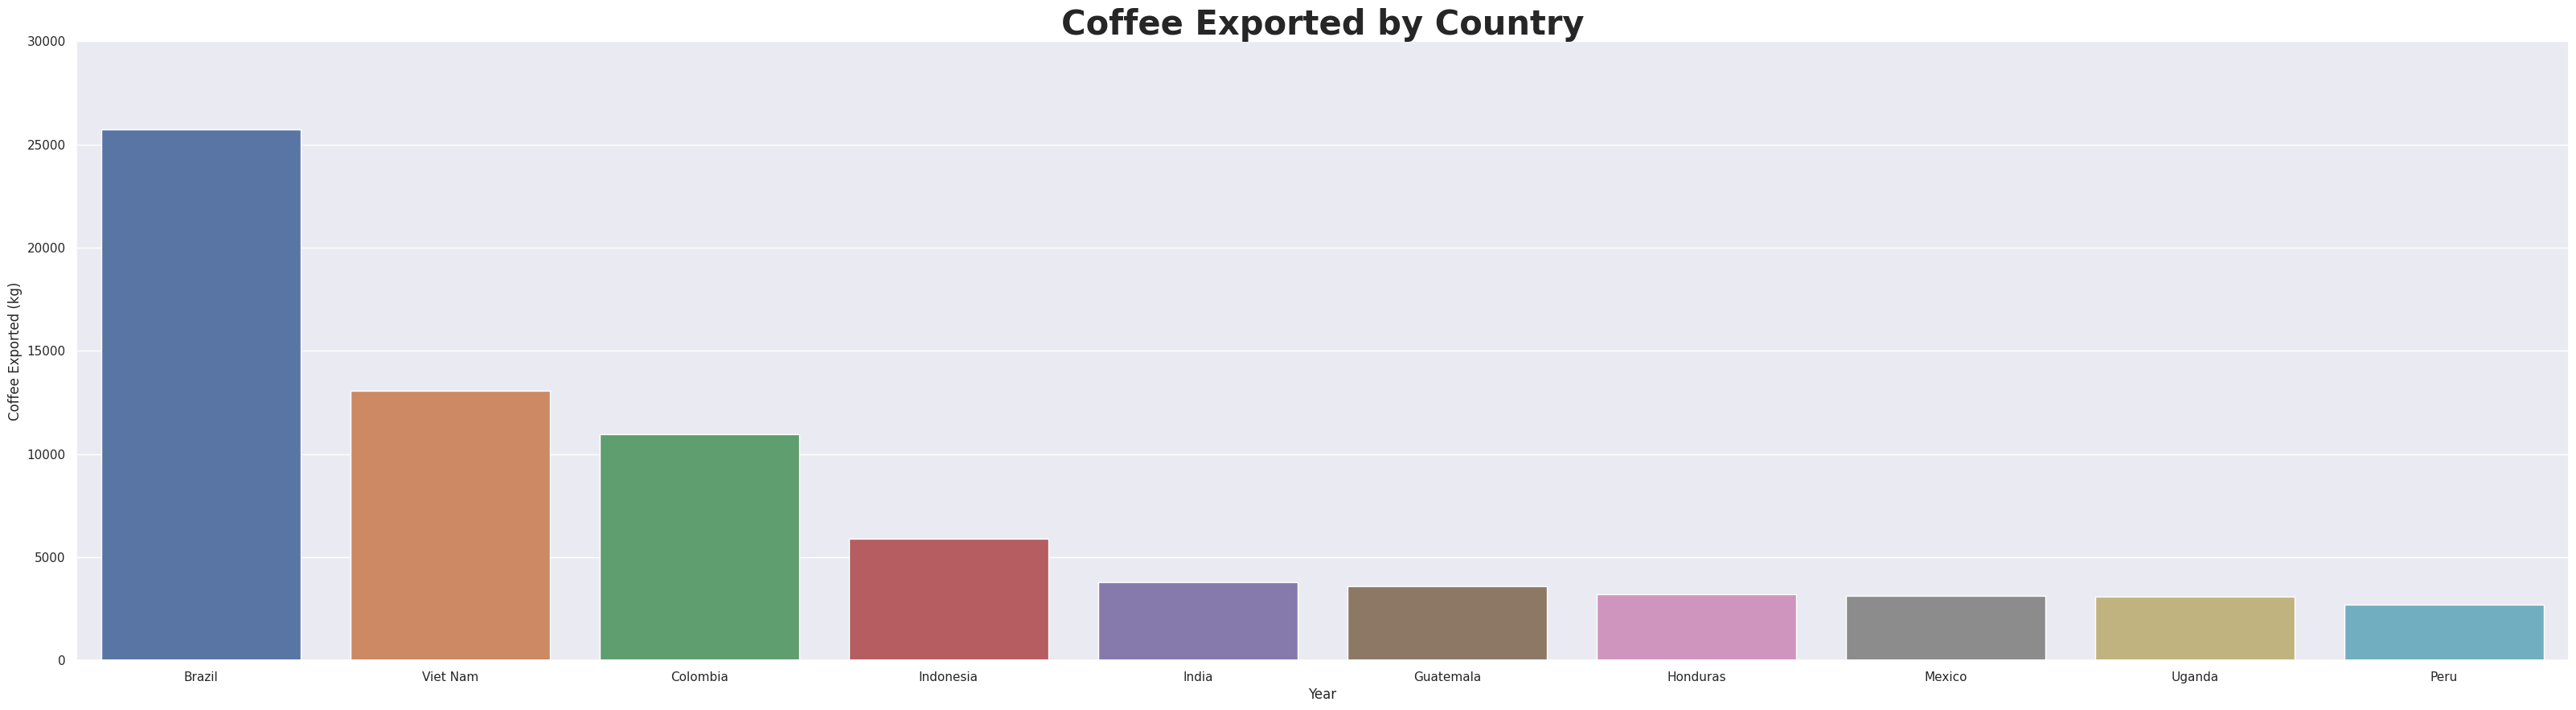

In [23]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
export_barplot = sns.barplot(x=top_ten_export['country'], y = top_ten_export['exports'])
export_barplot.set_ylabel('Coffee Exported (kg)')
export_barplot.set_xlabel('Year')
export_barplot.set_title('Coffee Exported by Country', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,30000)
export_barplot.show()

In [24]:
#Drop the outlier in the data (Brazil)
no_brazil = data.drop(data.query("country=='Brazil'").index)
no_brazil = no_brazil.sort_values(by='domestic_consumption', ascending=False)

(0.0, 3000.0)

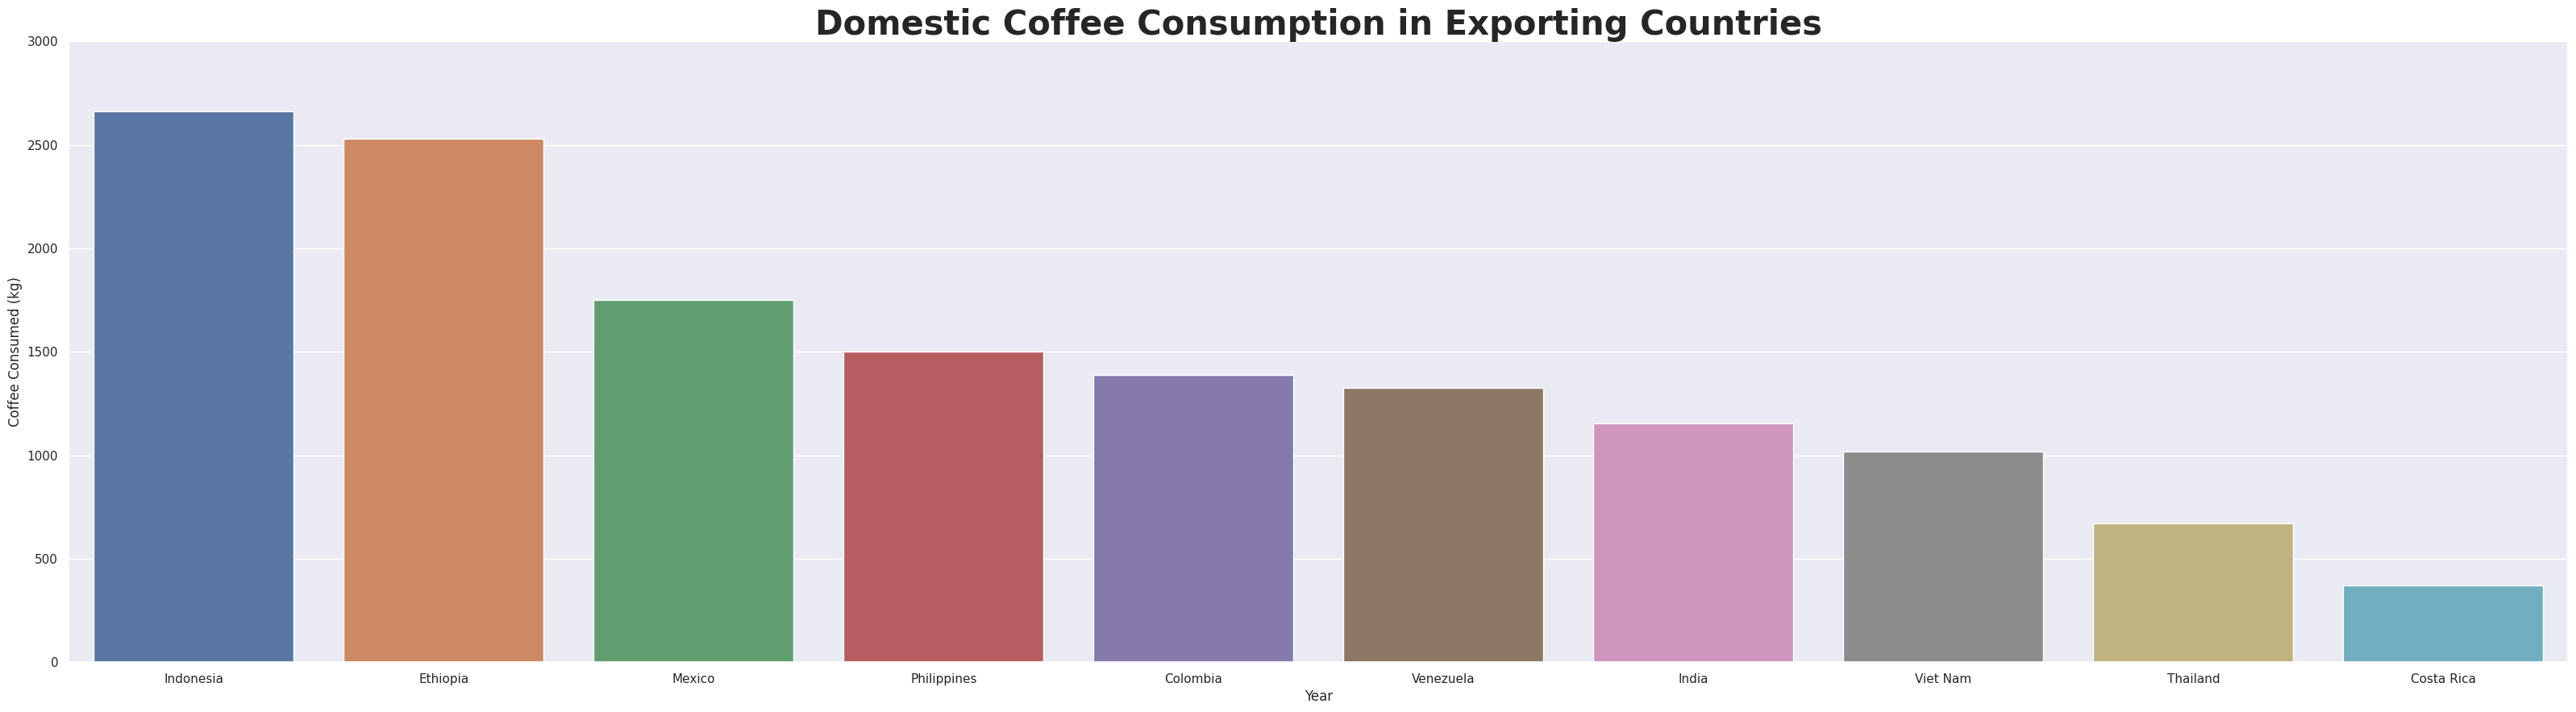

In [25]:
#Create same bar graphs, but excluding Brazil
top_ten_consume = no_brazil.head(10)
sns.set(rc={"figure.figsize":(40, 10)})
consume_barplot = sns.barplot(x=top_ten_consume['country'], y = top_ten_consume['domestic_consumption'], dodge=False)
consume_barplot.set_ylabel('Coffee Consumed (kg)')
consume_barplot.set_xlabel('Year')
consume_barplot.set_title('Domestic Coffee Consumption in Exporting Countries', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,3000)
consume_barplot.show()

(0.0, 14000.0)

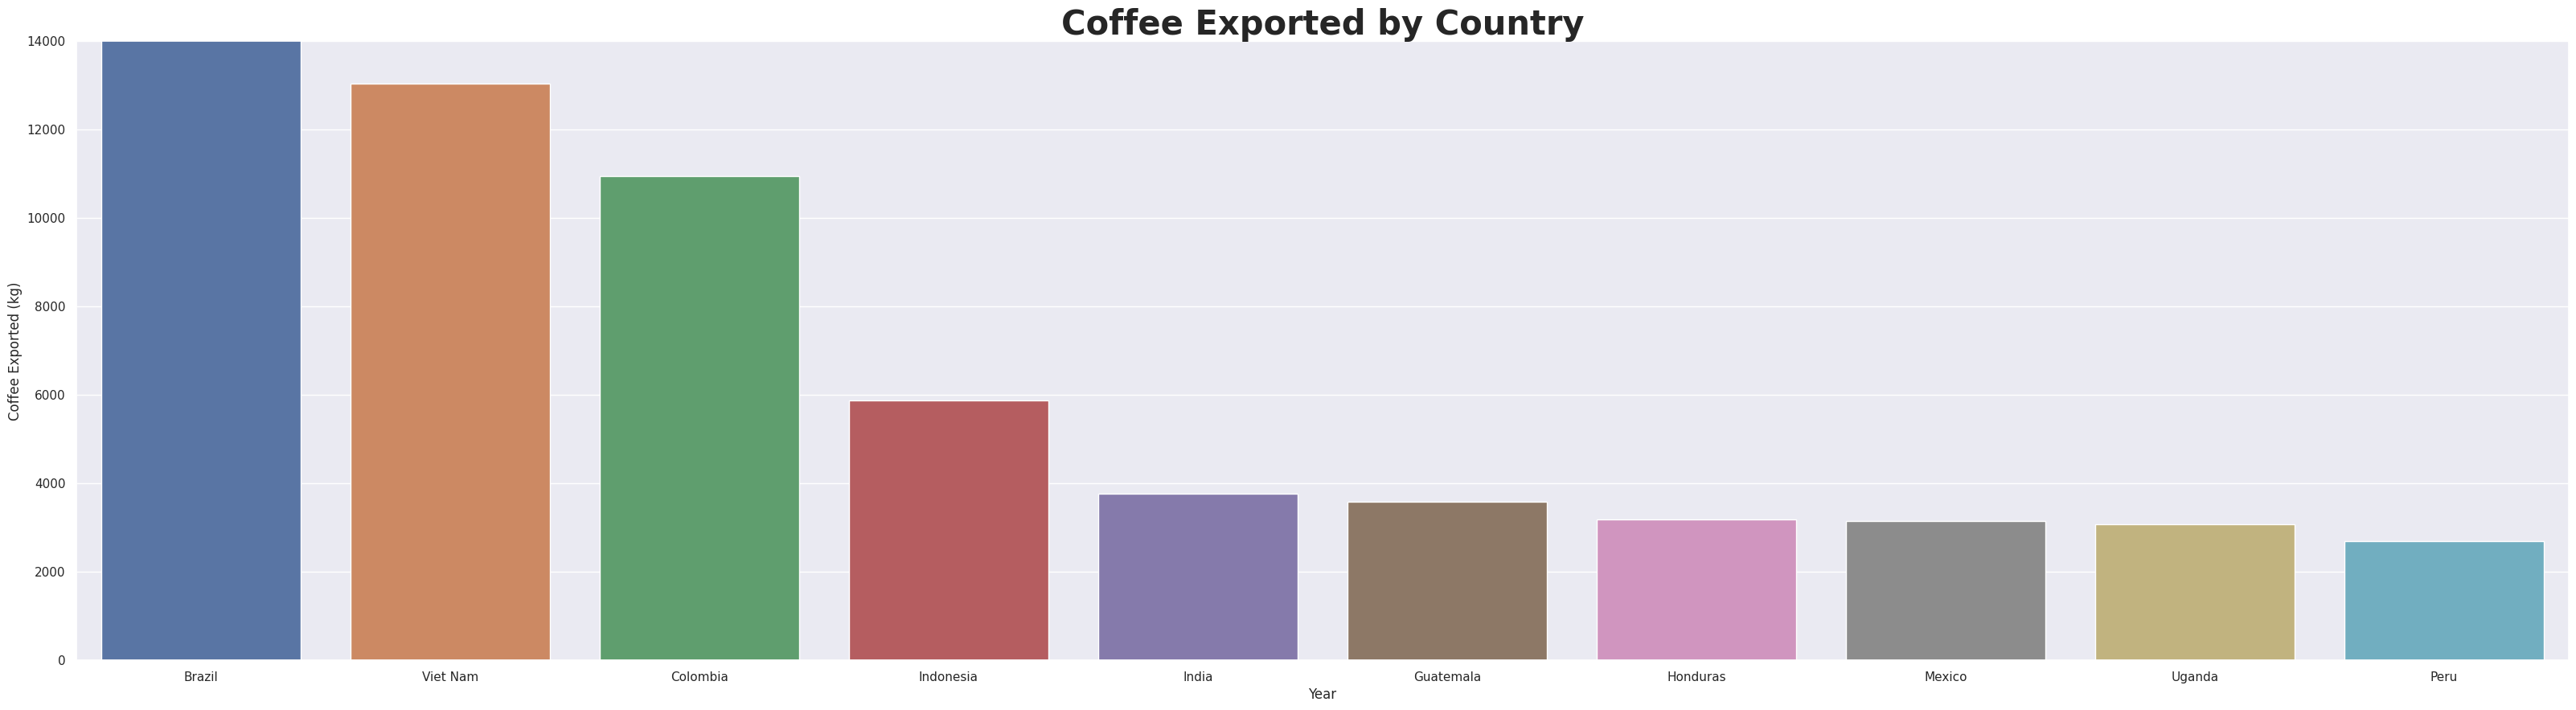

In [26]:
#Create bar graph of top ten Countries by coffee exports
data = data.sort_values(by='exports', ascending=False)
top_ten_export = data.head(10)
export_barplot = sns.barplot(x=top_ten_export['country'], y = top_ten_export['exports'])
export_barplot.set_ylabel('Coffee Exported (kg)')
export_barplot.set_xlabel('Year')
export_barplot.set_title('Coffee Exported by Country', fontdict={'size': 30, 'weight': 'bold'})
plt.ylim(0,14000)
export_barplot.show()

In [27]:
#Create new dataframe off only numeric fields, create correlation map
stats = data[['exports', 'domestic_consumption', 'exports_crop_year', 'gross_opening_stocks', 'total_production']]
stats.corr()

,exports,domestic_consumption,exports_crop_year,gross_opening_stocks,total_production
exports,1.000000,0.858257,0.999821,0.864050,0.986069
domestic_consumption,0.858257,1.000000,0.853489,0.976774,0.929710
exports_crop_year,0.999821,0.853489,1.000000,0.859479,0.984784
gross_opening_stocks,0.864050,0.976774,0.859479,1.000000,0.928748
total_production,0.986069,0.929710,0.984784,0.928748,1.000000


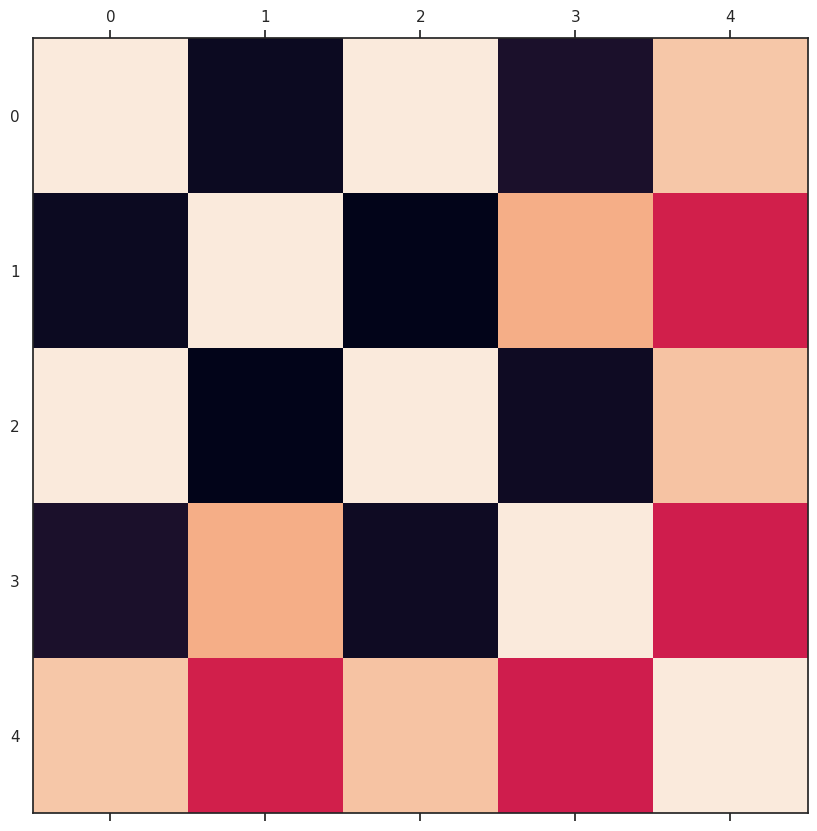

In [28]:
#Create heatmap of correlated data
sns.set_theme(style="white")
corr = stats.corr(method = 'pearson',  # The method of correlation
                  min_periods = 1 )
corr.style.background_gradient(cmap='coolwarm')
plt.matshow(corr)

(0.0, 26991.502188534658)

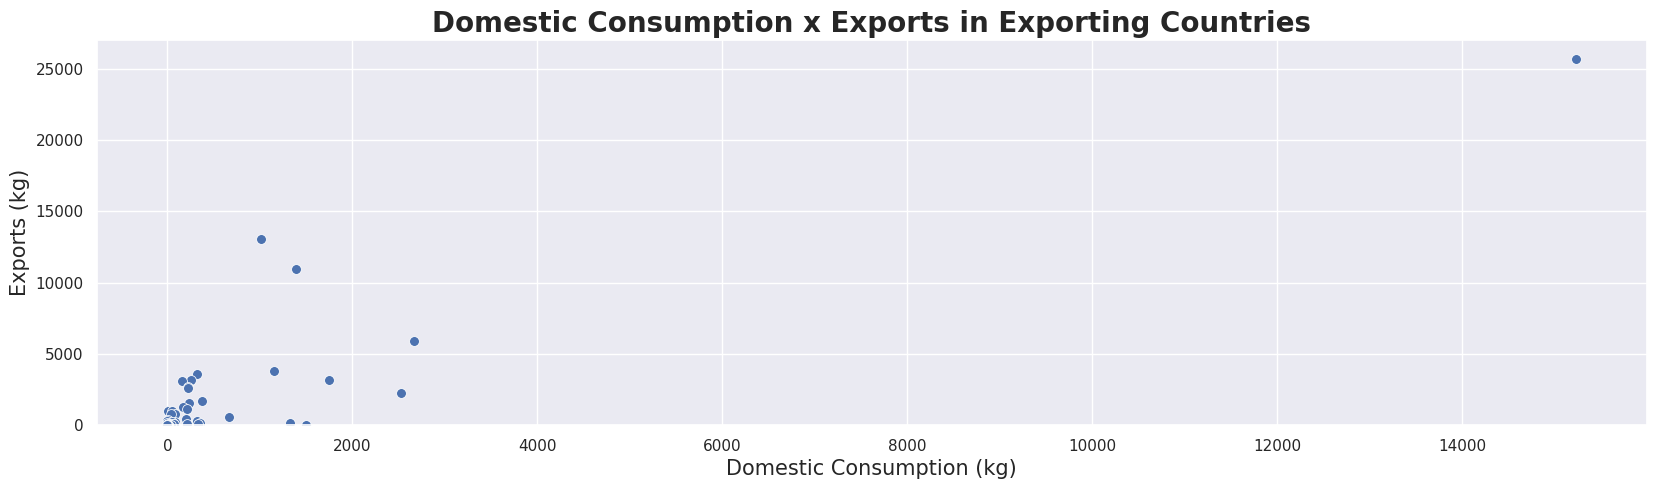

In [29]:
#Scatter plot comparing domestic consumption x exports
sns.set(rc={"figure.figsize":(20, 5)})
scatter = sns.scatterplot(data=data, x='domestic_consumption', y='exports', legend='auto', s=50)
scatter.set_title("Domestic Consumption x Exports in Exporting Countries", fontdict={'size': 20, 'weight': 'bold'})
scatter.set_xlabel('Domestic Consumption (kg)', fontdict={'size': 15})
scatter.set_ylabel('Exports (kg)', fontdict={'size': 15})
plt.ylim(0)
scatter.show()

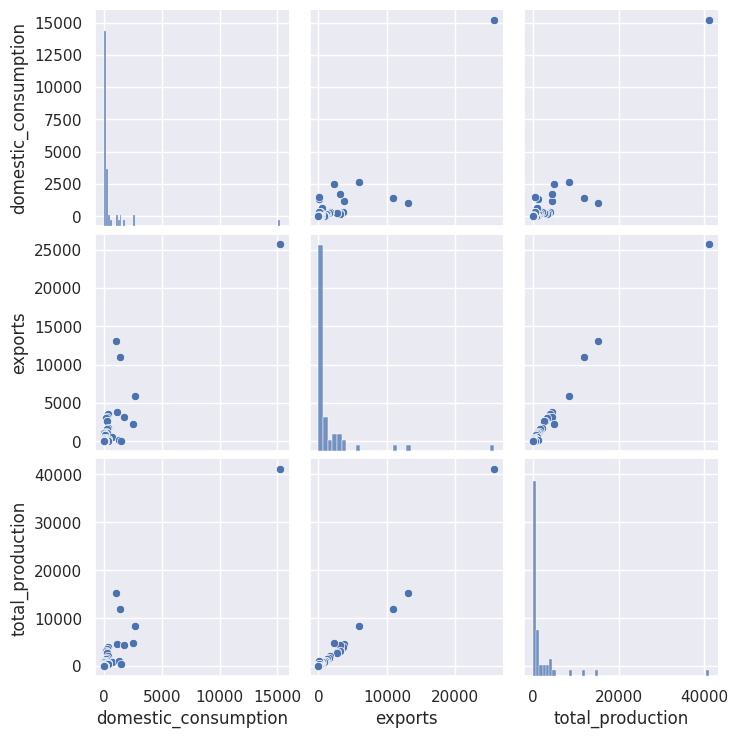

In [30]:
#Create a grid of pairplots between domestic consumption, exports, and production
pairplot = sns.pairplot(data, vars=['domestic_consumption', 'exports', 'total_production'])
pairplot.show()

In [165]:
#Read in new data file
df = pd.read_csv('./data/Domestic_Coffee_Consumption.csv')
df.head()

#Create new dataframe of coffee types, clean data a bit
types = df['Coffee type']
types = types.replace({'Robusta/Arabica':'Both'})
types = types.replace({'Arabica/Robusta':'Both'})
pie = types.value_counts()

<Axes: title={'center': 'Coffee Types Consumed in Exporting Countries'}, ylabel='Coffee type'>

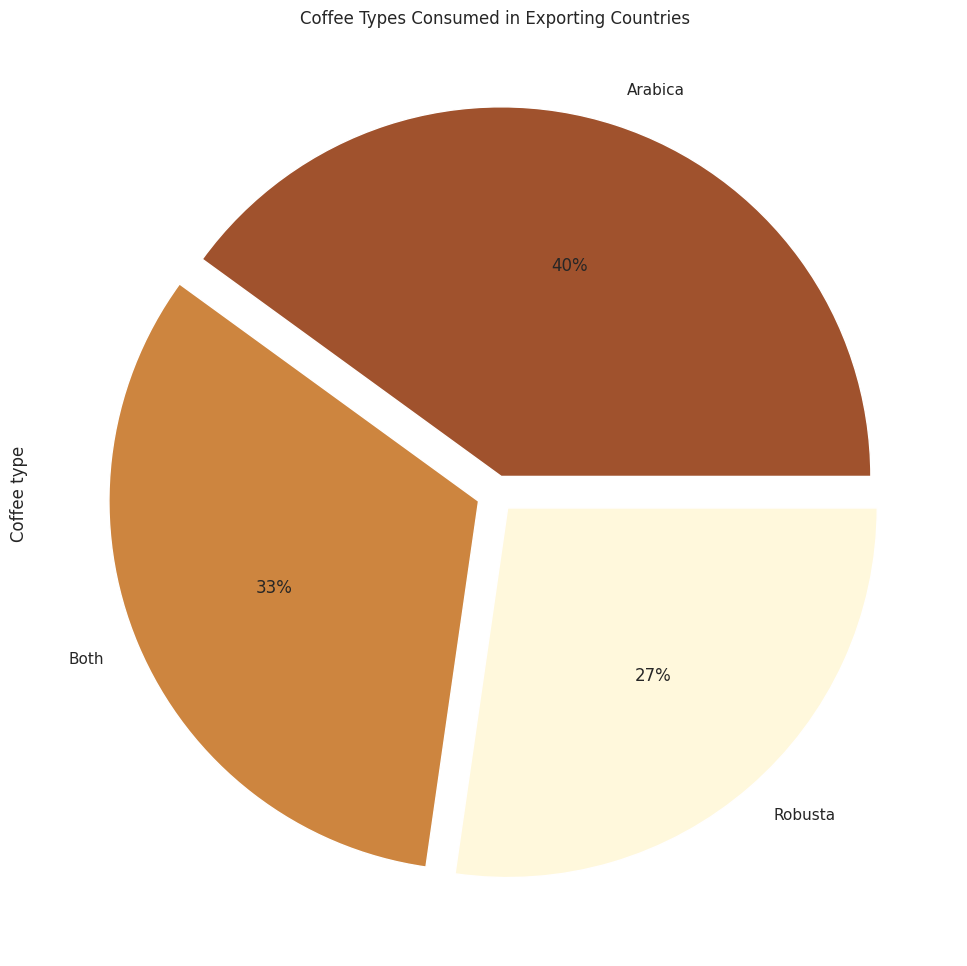

In [166]:
# Defining colors for the pie chart
colors = ['sienna', 'peru', 'cornsilk']
  
# Define the ratio of gap of each fragment in a tuple
x = (0.05, 0.05, 0.05)

#Create pie chart of coffee types
plt.ylabel(None)
pie.plot(kind='pie', title="Coffee Types Consumed in Exporting Countries", autopct='%1.0f%%', colors=colors, explode=x)


<Axes: title={'center': 'Coffee Consumption Across Exporting Countries Over Time'}, xlabel='Year', ylabel='Coffee Consumed (kg)'>

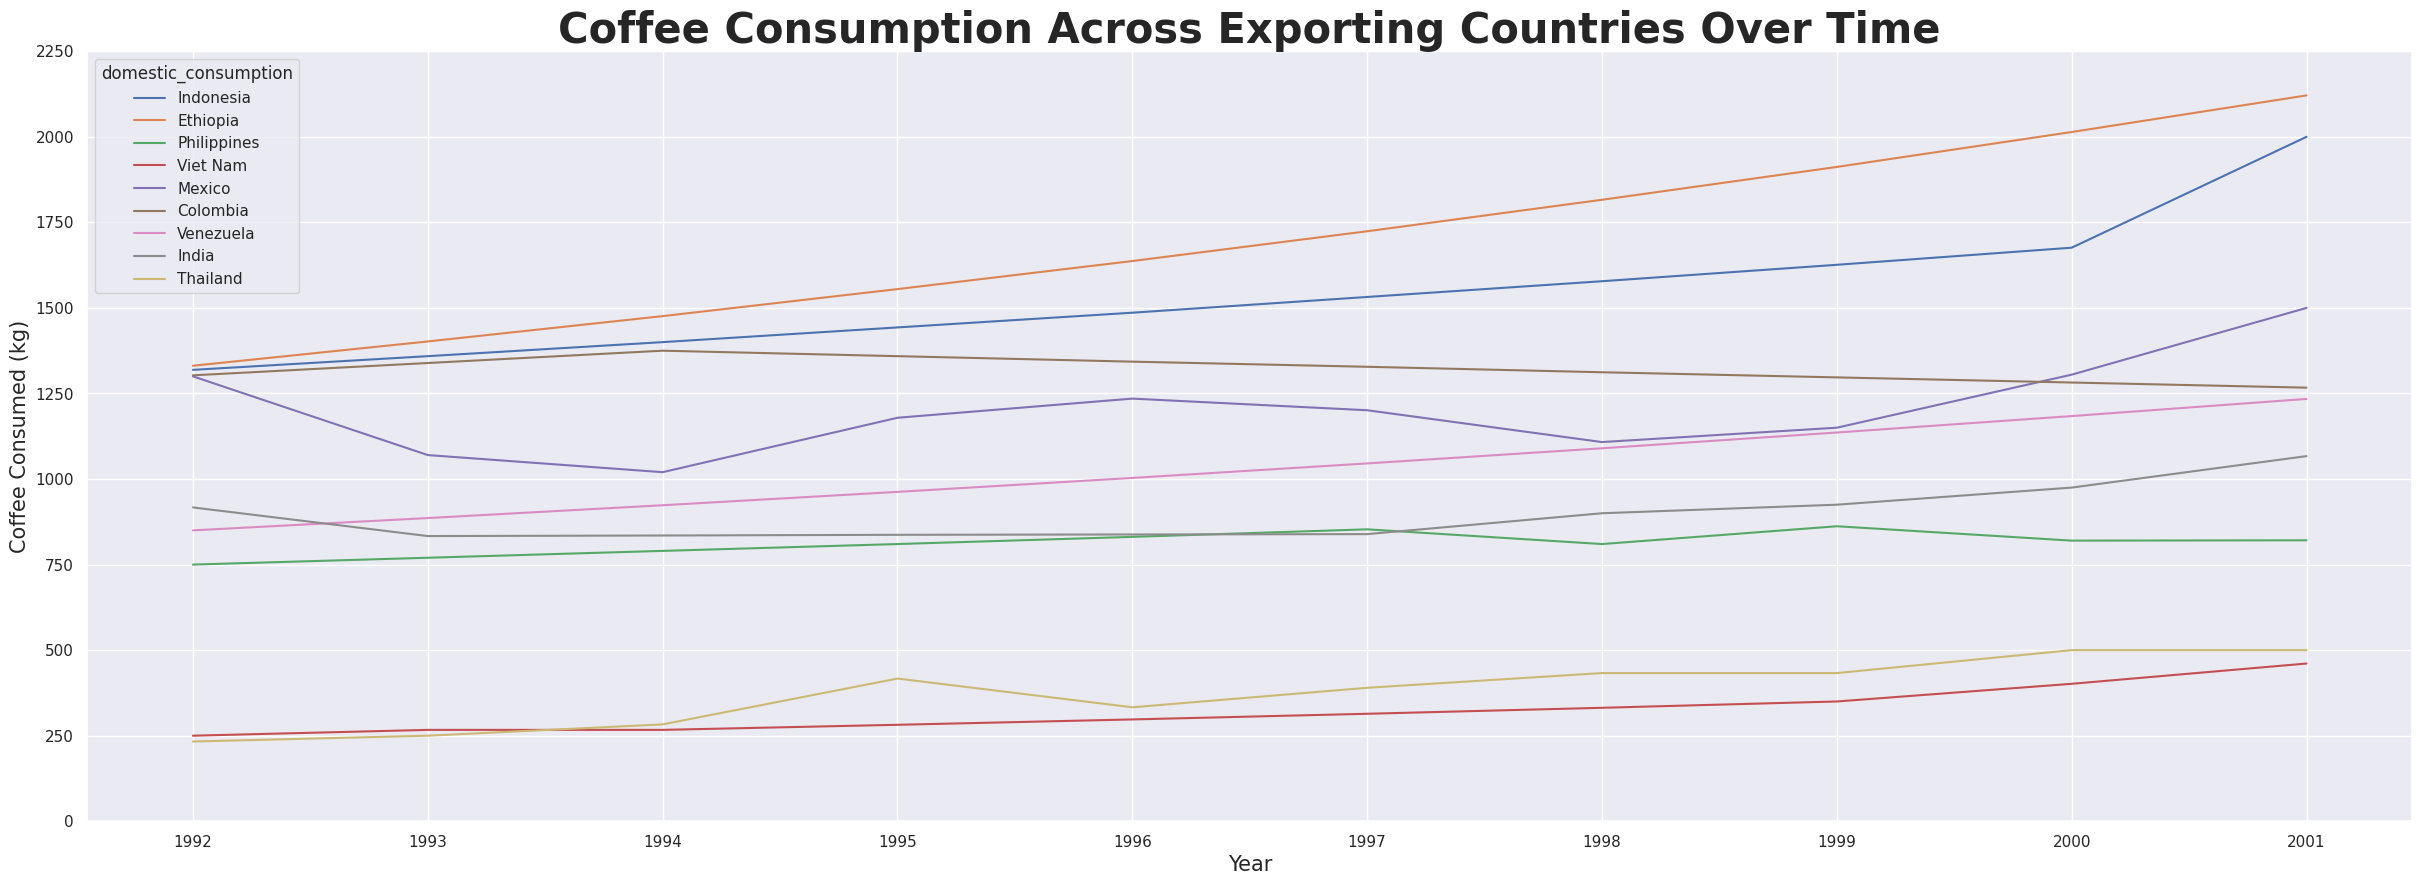

In [33]:
#Read in new data file
df = pd.read_csv('./data/domestic-consumption.csv')

#sort by consumption in 2018
df = df.sort_values(by='2018', ascending=False)
df = df.reset_index(drop=True)
top_ten = df.head(10)

#Transpose the data frame
pivot = top_ten.transpose()

#rename columns to row 1
pivot.columns = pivot.iloc[0]

#drop first two rows
pivot = pivot.iloc[3:]

#rename index
pivot.index.names = ['Year']

pivot2 = pivot.copy()

#Drop the outlier in the data (Brazil)
pivot2.drop('Brazil', axis=1, inplace=True) 

top_ten_consume_overtime = pivot2.head(10)

sns.set(rc={"figure.figsize":(30, 10)}) 

consume_plot = sns.lineplot(data=top_ten_consume_overtime, dashes=False)
consume_plot.set_title("Coffee Consumption Across Exporting Countries Over Time", fontdict={'size': 30, 'weight': 'bold'})
consume_plot.set_xlabel('Year', fontdict={'size': 15})
consume_plot.set_ylabel('Coffee Consumed (kg)', fontdict={'size': 15})
plt.ylim(0, 2250)
consume_plot.show()

# Analyze Brazil

In [34]:
#Reset pivot and create Brazil coffee consumption dataframe
pivot.drop(pivot.columns.difference(['Brazil']), 1, inplace=True)
Brazil_consume = pivot.copy()
Brazil_consume.rename(columns={'Brazil': 'consumption'}, inplace=True)
Brazil_consume.head()

#Create another Brazil dataframe from the production data
df = pd.read_csv('./data/total-production.csv')
pivot2 = df.transpose()
pivot2.columns = pivot2.iloc[0]
pivot2 = pivot2.drop('total_production')
pivot2.index.names = ['Year']
pivot2.drop(pivot2.columns.difference(['Brazil']), 1, inplace=True)
Brazil_prod = pivot2.copy()
Brazil_prod.rename(columns={'Brazil': 'production'}, inplace=True)
Brazil_prod.head()

#Combine the two
Brazil = pd.concat([Brazil_prod, Brazil_consume], axis=1)
Brazil.head(10)

/tmp/ipykernel_21642/1765614992.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot.drop(pivot.columns.difference(['Brazil']), 1, inplace=True)
/tmp/ipykernel_21642/1765614992.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot2.drop(pivot2.columns.difference(['Brazil']), 1, inplace=True)


,production,consumption
Year,,
1990,27285.6286,NaN
1991,27293.4934,NaN
1992,34603.3542,8900.0
1993,28166.9786,9100.0
1994,28192.047,9300.0
1995,18060.2022,10100.0
1996,29196.743,11000.0
1997,26148.004,11500.0
1998,36760.8533,12200.0


<Axes: title={'center': 'Coffee Production x Consumption in Brazil Over Time'}, xlabel='Year', ylabel='Coffee Consumed (billion kg)'>

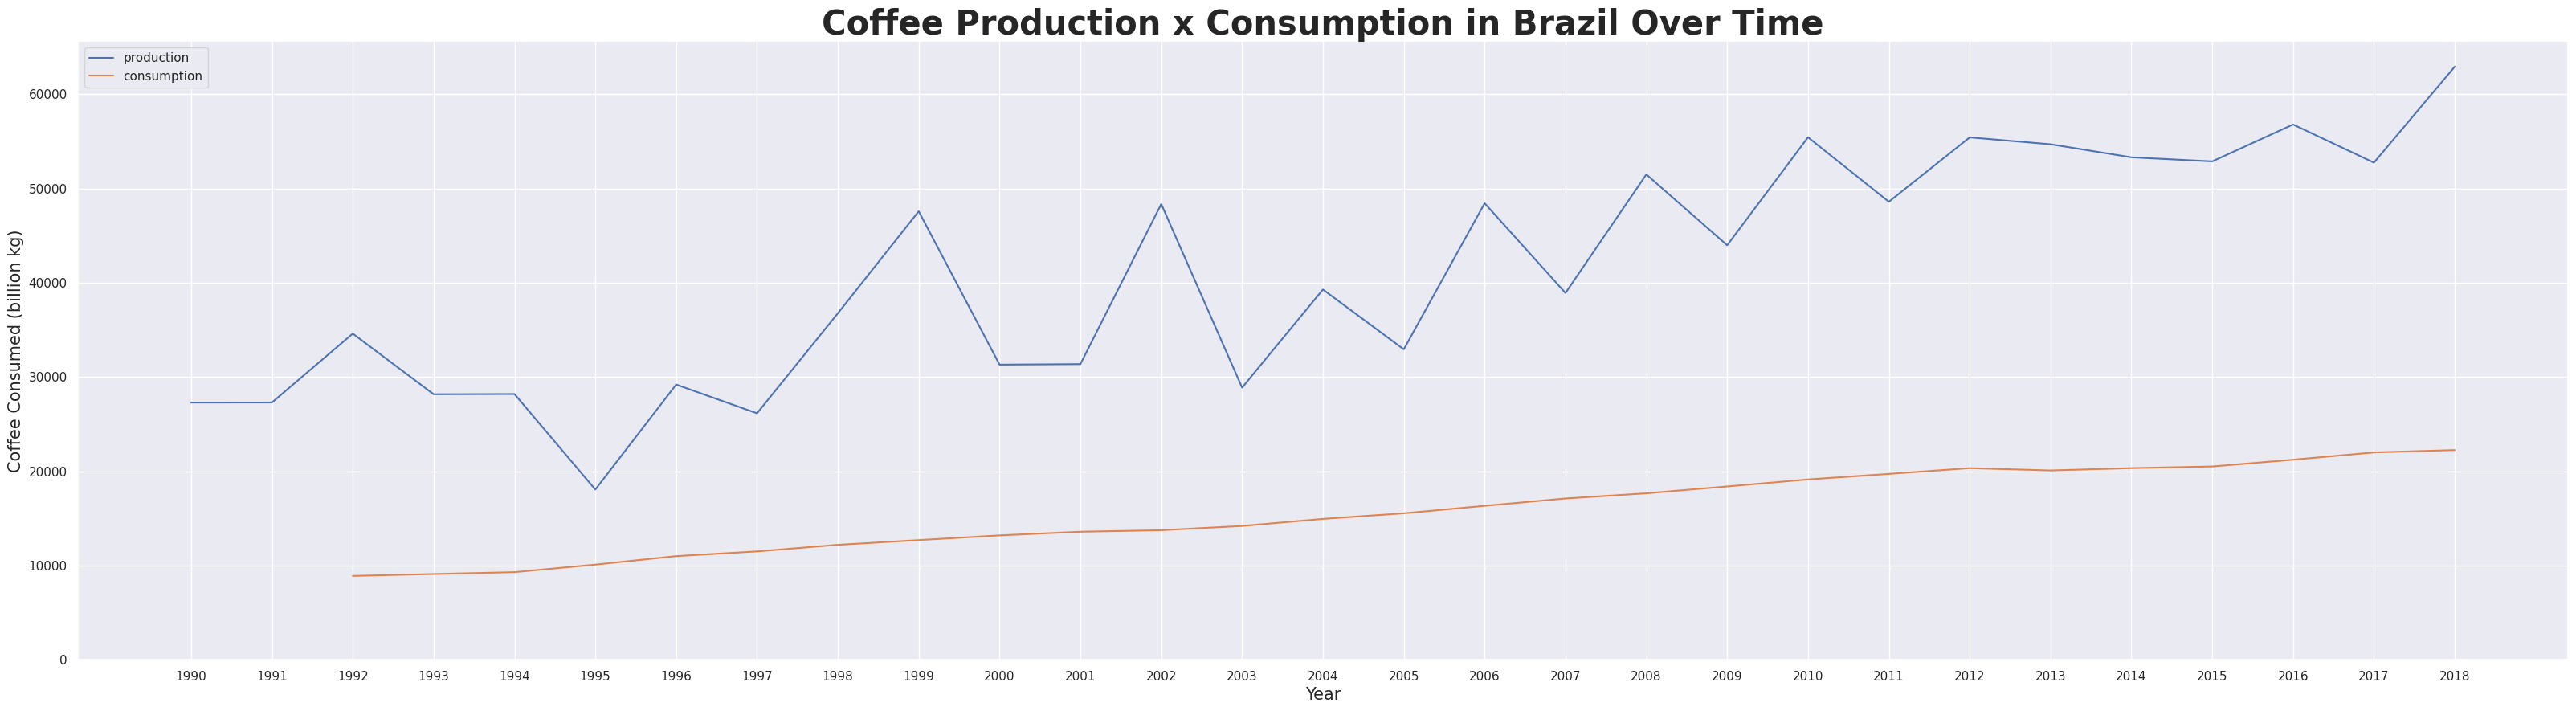

In [35]:
#Create line graph of Brazilian coffee consumption and production over time.
sns.set(rc={"figure.figsize":(40, 10)})
brazil_consumption = sns.lineplot(data=Brazil, dashes=False)
brazil_consumption.set_title('Coffee Production x Consumption in Brazil Over Time', fontdict={'size': 30, 'weight': 'bold'})
brazil_consumption.set_xlabel('Year', fontdict={'size': 15})
brazil_consumption.set_ylabel('Coffee Consumed (billion kg)', fontdict={'size': 15})
plt.ylim(0)
brazil_consumption.show()

# Retail Prices vs Pay to Growers

In [36]:
#Read in new data file
df = pd.read_csv('./data/retail-prices.csv')

#sort by retail price in 2018
data = df.sort_values(by='2018', ascending=False)
data = data.reset_index(drop=True)
data.head()

,retail_prices,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United Kingdom,23.289183,22.980132,22.273731,18.631347,25.077263,30.441501,29.470199,32.891832,34.039735,...,35.298013,34.657837,41.986755,42.384106,41.766004,45.386313,41.743929,35.960265,37.549669,40.618102
1,Italy,11.721854,12.406181,12.935982,10.132450,10.331126,12.582781,13.068433,12.030905,12.207506,...,16.953642,16.203091,18.807947,18.741722,19.845475,19.536424,16.512141,16.445916,16.931567,17.924945
2,Austria,10.816777,10.088300,11.015453,10.971302,10.110375,11.434879,11.964680,9.646799,8.763797,...,15.342163,14.768212,18.366446,18.498896,19.028698,19.050773,16.423841,12.450331,13.730684,14.635762
3,Japan,22.649007,26.225166,27.858720,32.163355,32.428256,39.116998,33.642384,31.390728,29.845475,...,13.399558,14.105960,16.225166,16.710817,13.355408,12.538631,12.362031,13.708609,13.134658,12.803532
4,Cyprus,6.247241,6.181015,6.335541,5.739514,7.019868,9.403974,9.116998,8.918322,10.176600,...,12.207506,11.501104,13.377483,14.039735,14.282561,14.304636,11.699779,11.699779,12.141280,12.781457


/tmp/ipykernel_21642/2553822413.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot['average'] = df.mean()


<Axes: title={'center': 'Retail Price of Coffee Across Importing Countries Over Time'}, xlabel='Year', ylabel='Price of coffee per gram'>

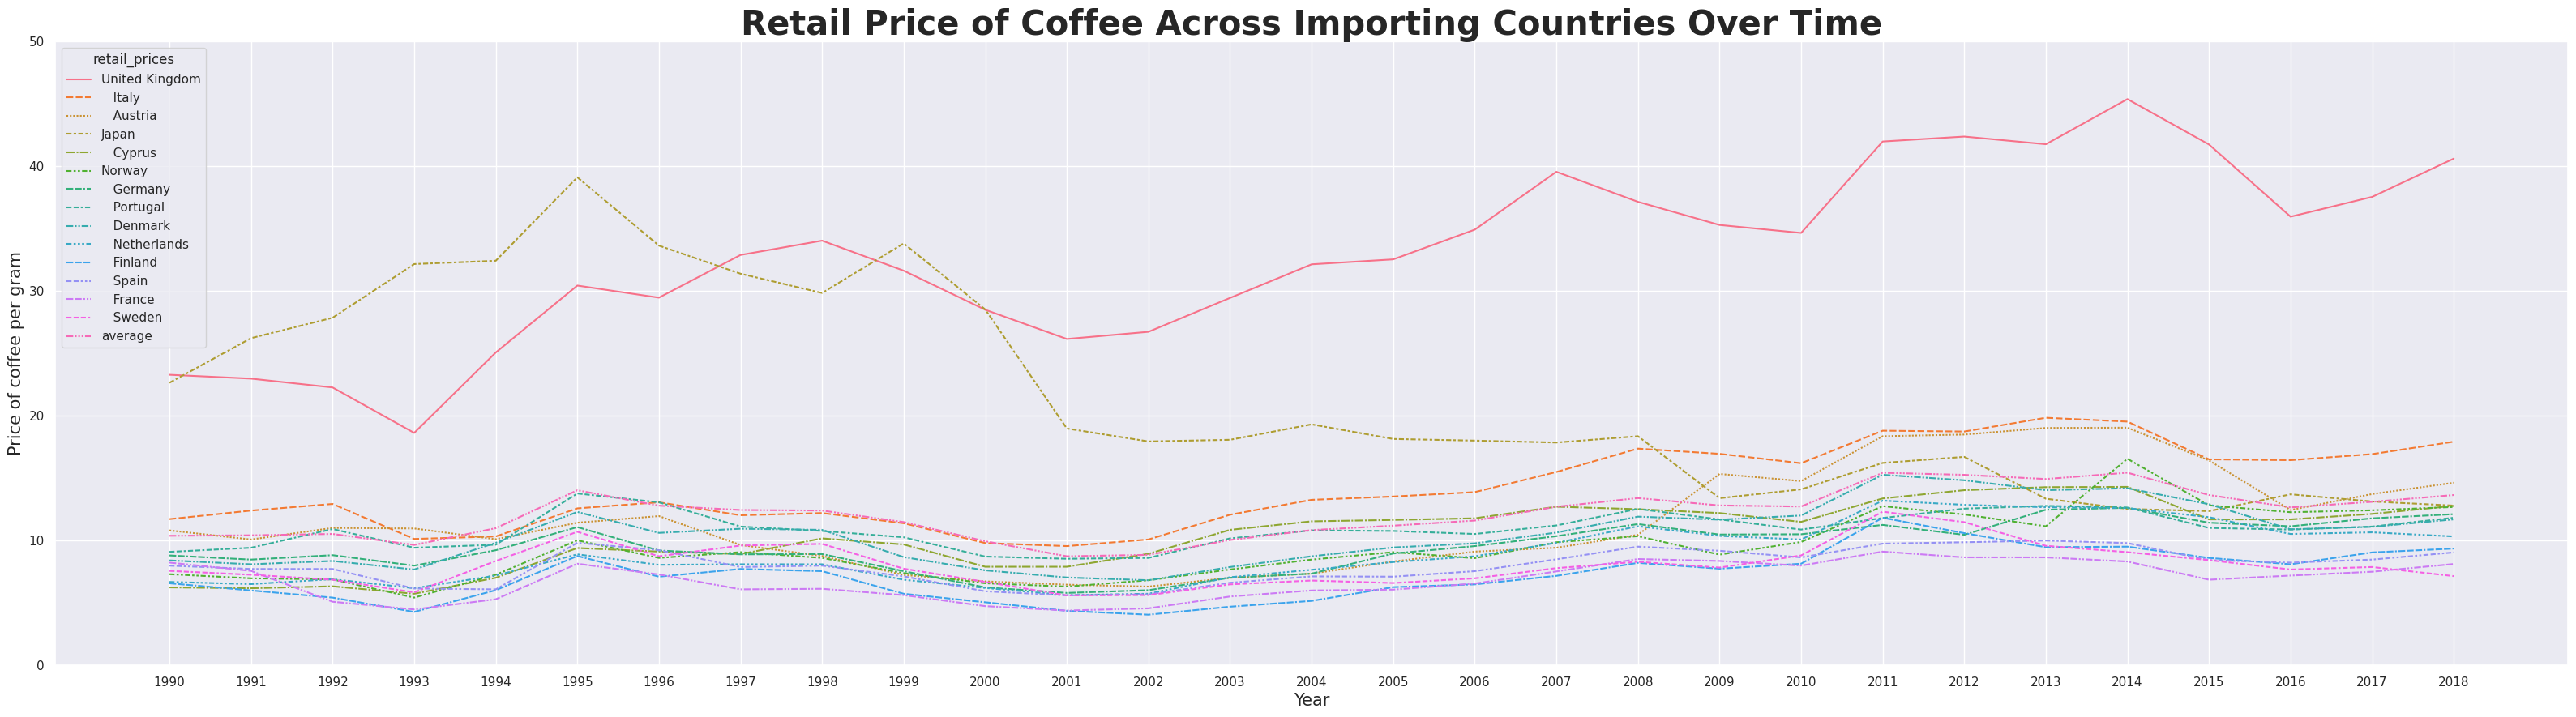

In [37]:
#Clean data and plot retail prices on line graph
pivot = data.transpose()
pivot.columns = pivot.iloc[0]
pivot = pivot.iloc[1:]
pivot.index.names = ['Year']
pivot['Years'] = pivot.index
pivot['average'] = df.mean()
retail_prices = sns.lineplot(data=pivot)
retail_prices.set_title('Retail Price of Coffee Across Importing Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
retail_prices.set_xlabel('Year', fontdict={'size': 15})
retail_prices.set_ylabel('Price of coffee per gram', fontdict={'size': 15})
plt.ylim(0, 50)
retail_prices.show()

/tmp/ipykernel_21642/1178331810.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pivot2['average'] = df.mean()


<Axes: title={'center': 'Coffee Grower Pay Across Exporting Countries Over Time'}, xlabel='Year', ylabel='Pay per gram of Coffee'>

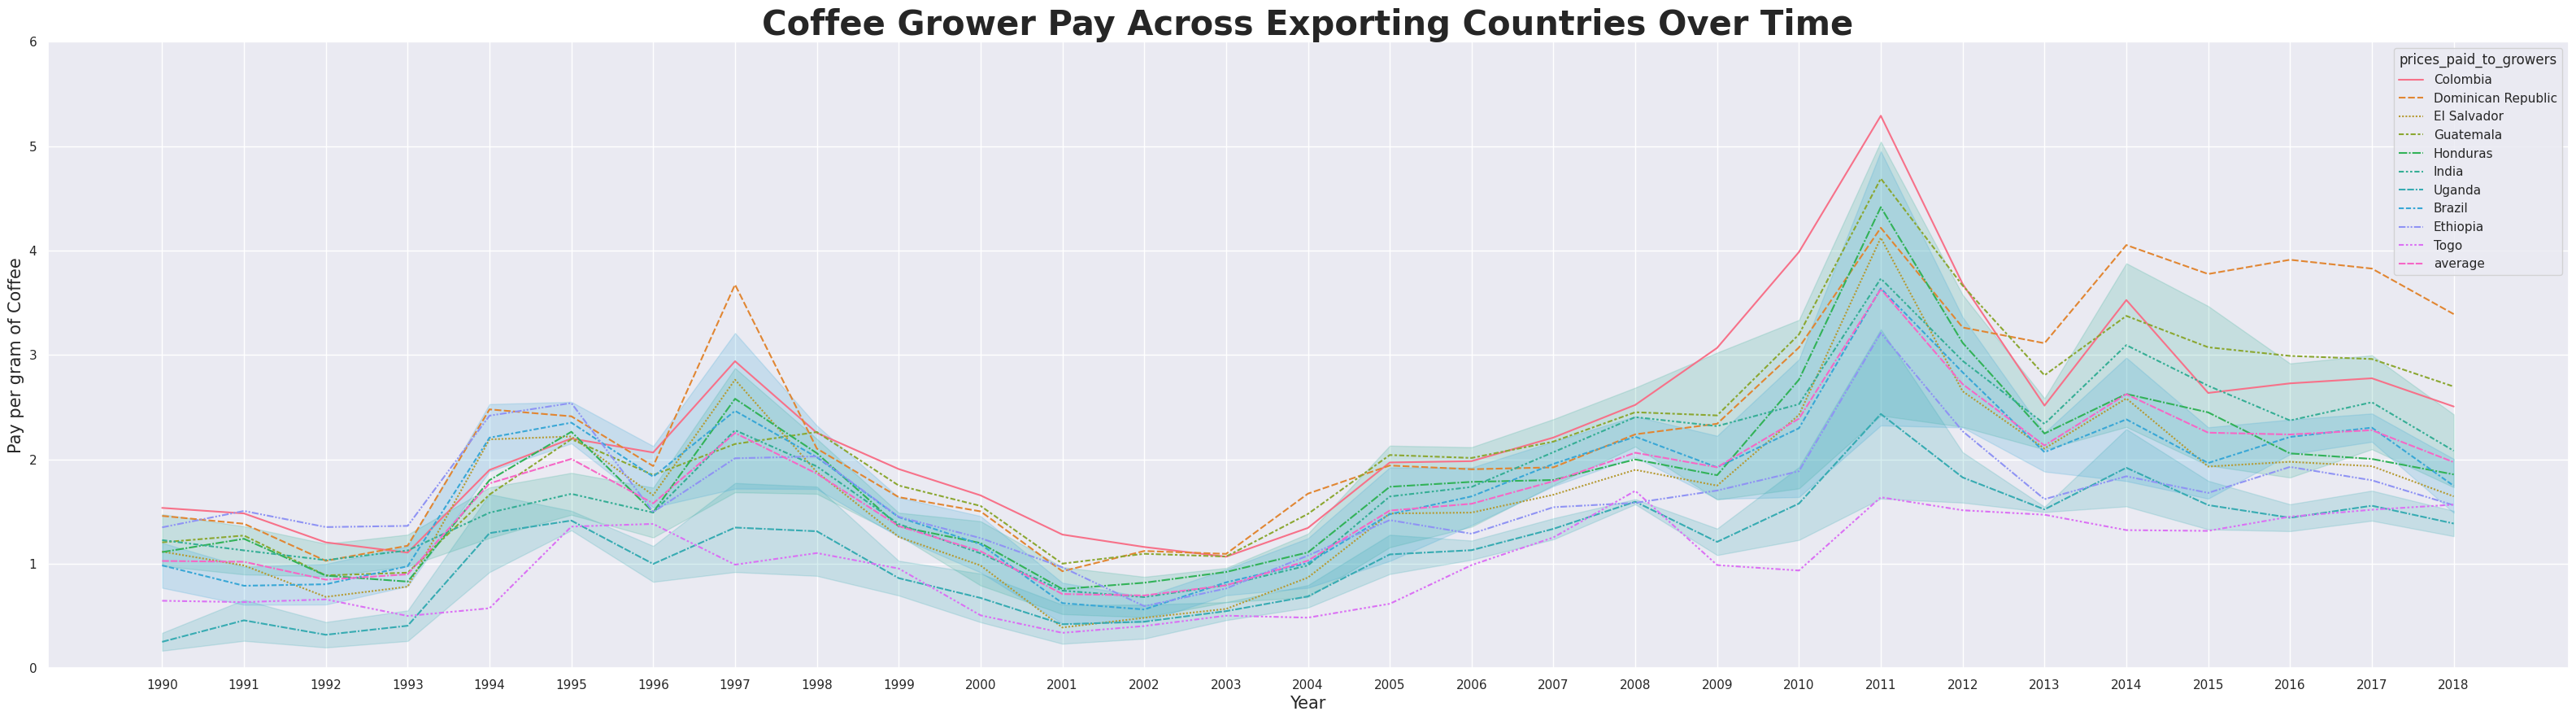

In [38]:
df = pd.read_csv('./data/prices-paid-to-growers.csv')
pivot2 = df.transpose()
pivot2.columns = pivot2.iloc[0]
pivot2 = pivot2.iloc[1:]
pivot2.index.names = ['Year']
pivot2['Years'] = pivot2.index
pivot2['average'] = df.mean()
grower_pay = sns.lineplot(data=pivot2)
grower_pay.set_title('Coffee Grower Pay Across Exporting Countries Over Time', fontdict={'size': 30, 'weight': 'bold'})
grower_pay.set_xlabel('Year', fontdict={'size': 15})
grower_pay.set_ylabel('Pay per gram of Coffee', fontdict={'size': 15})
plt.ylim(0, 6)
grower_pay.show()

In [39]:
#Combine average price to average pay over time
pivot.drop(pivot.columns.difference(['average']), 1, inplace=True)
avg_price = pivot.copy()
avg_price.rename(columns={'average': 'avg_price'}, inplace=True)

pivot2.drop(pivot2.columns.difference(['average']), 1, inplace=True)
avg_pay = pivot2.copy()
avg_pay.rename(columns={'average': 'avg_pay'}, inplace=True)

#Combine the two
compare_price_pay = pd.concat([avg_price, avg_pay], axis=1)
compare_price_pay.head()

/tmp/ipykernel_21642/3384333748.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot.drop(pivot.columns.difference(['average']), 1, inplace=True)
/tmp/ipykernel_21642/3384333748.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  pivot2.drop(pivot2.columns.difference(['average']), 1, inplace=True)


,avg_price,avg_pay
Year,,
1990,10.386313,1.026493
1991,10.424156,1.018779
1992,10.532955,0.847206
1993,9.651529,0.898745
1994,10.994954,1.769350


<Axes: title={'center': 'Average Price of Coffee x Average Pay to Grower Over Time'}, xlabel='Year', ylabel='Price'>

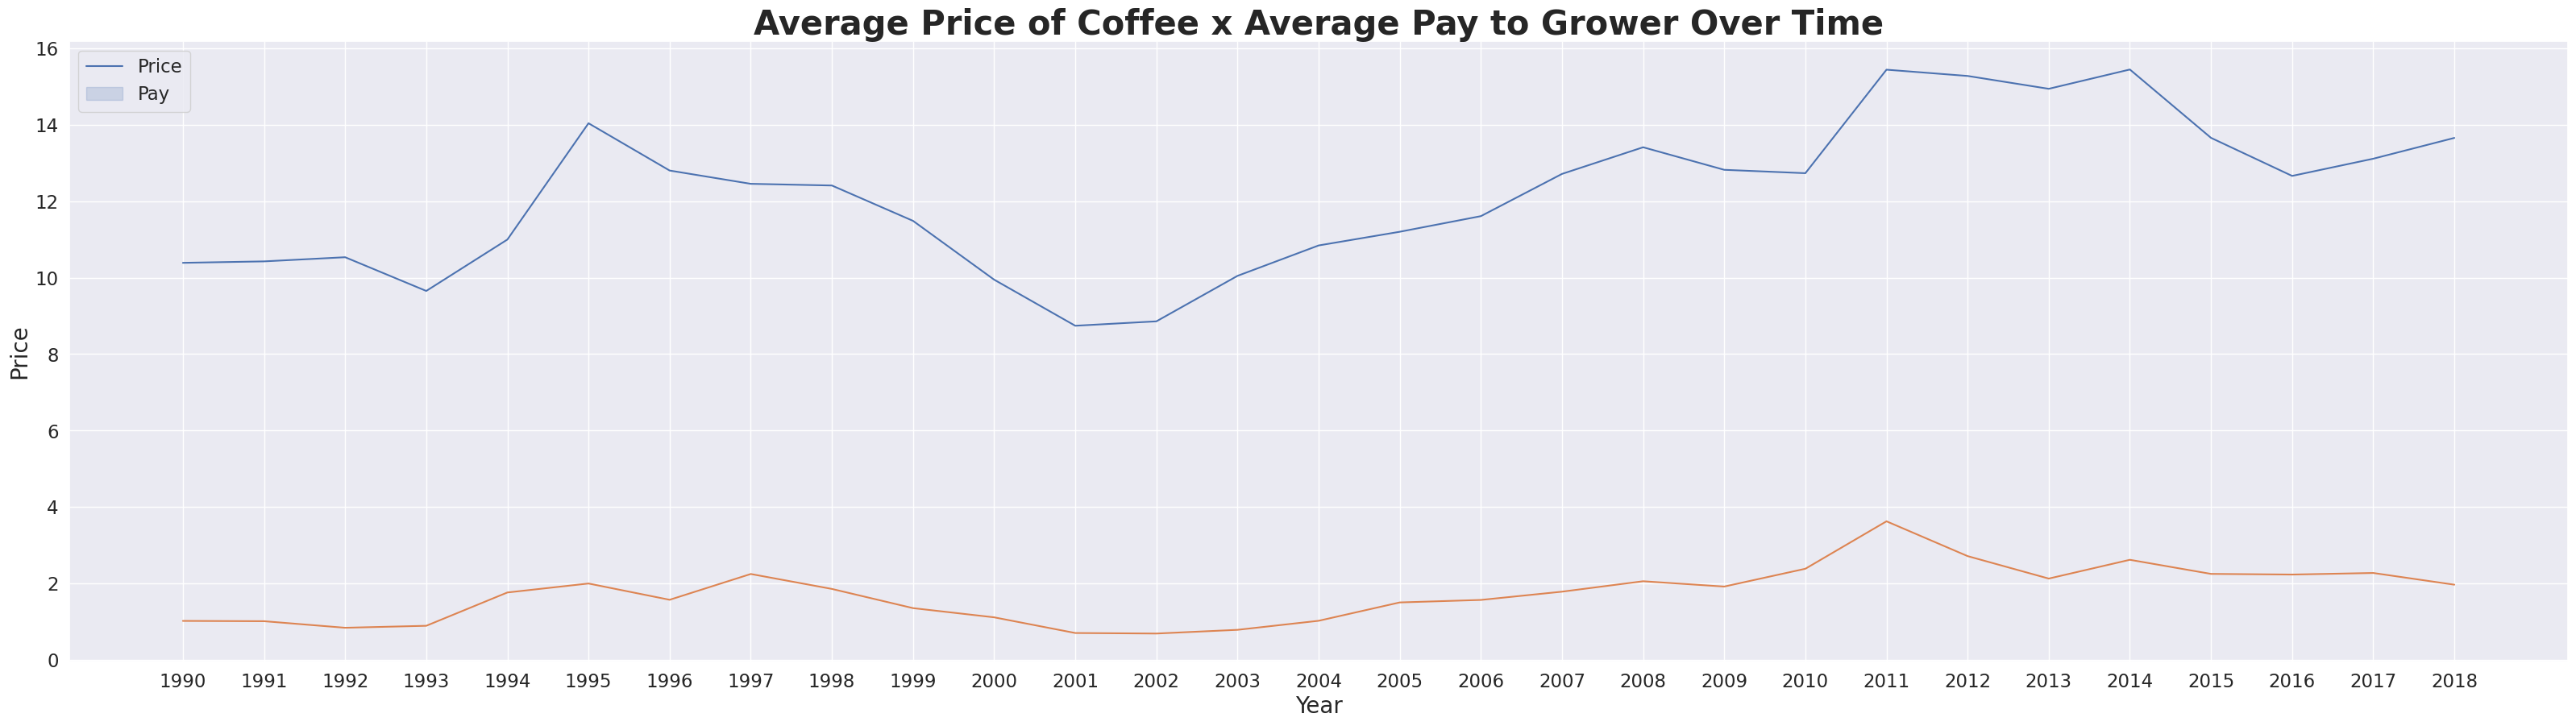

In [40]:
#Plot the two
sns.set(font_scale=1.5)
price_pay_plot = sns.lineplot(data=compare_price_pay, dashes=False)
price_pay_plot.set_title('Average Price of Coffee x Average Pay to Grower Over Time', fontdict={'size': 30, 'weight': 'bold'})
price_pay_plot.set_xlabel('Year', fontdict={'size': 20})
price_pay_plot.set_ylabel('Price', fontdict={'size': 20})
plt.legend(loc='upper left', labels=['Price', 'Pay'])
price_pay_plot.show()

In [168]:
#Read in new file and clean data
df = pd.read_csv('./data/Coffee-characteristics.csv')
df = df.drop(columns=['Farm.Name', 'Lot.Number', 'Certification.Address', 'Certification.Contact', 'Altitude', 'Region', 'Species', 'Mill', 'ICO.Number'])
df = df[pd.to_numeric(df['ID'], errors='coerce').notnull()]
df.head()

,ID,Owner,Country.of.Origin,Company,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,...,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,metad plc,Ethiopia,metad agricultural developmet plc,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",...,0,0,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
1,2,metad plc,Ethiopia,metad agricultural developmet plc,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",...,0,0,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.0,2200.0,2075.0
2,3,grounds for health admin,Guatemala,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",...,0,0,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,m,1600.0,1800.0,1700.0
3,4,yidnekachew dabessa,Ethiopia,yidnekachew debessa coffee plantation,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",...,0,0,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,m,1800.0,2200.0,2000.0
4,5,metad plc,Ethiopia,metad agricultural developmet plc,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",...,0,0,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,m,1950.0,2200.0,2075.0


/tmp/ipykernel_114304/2399209997.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  countries.drop(countries.columns.difference(['Country.of.Origin']), 1, inplace=True)


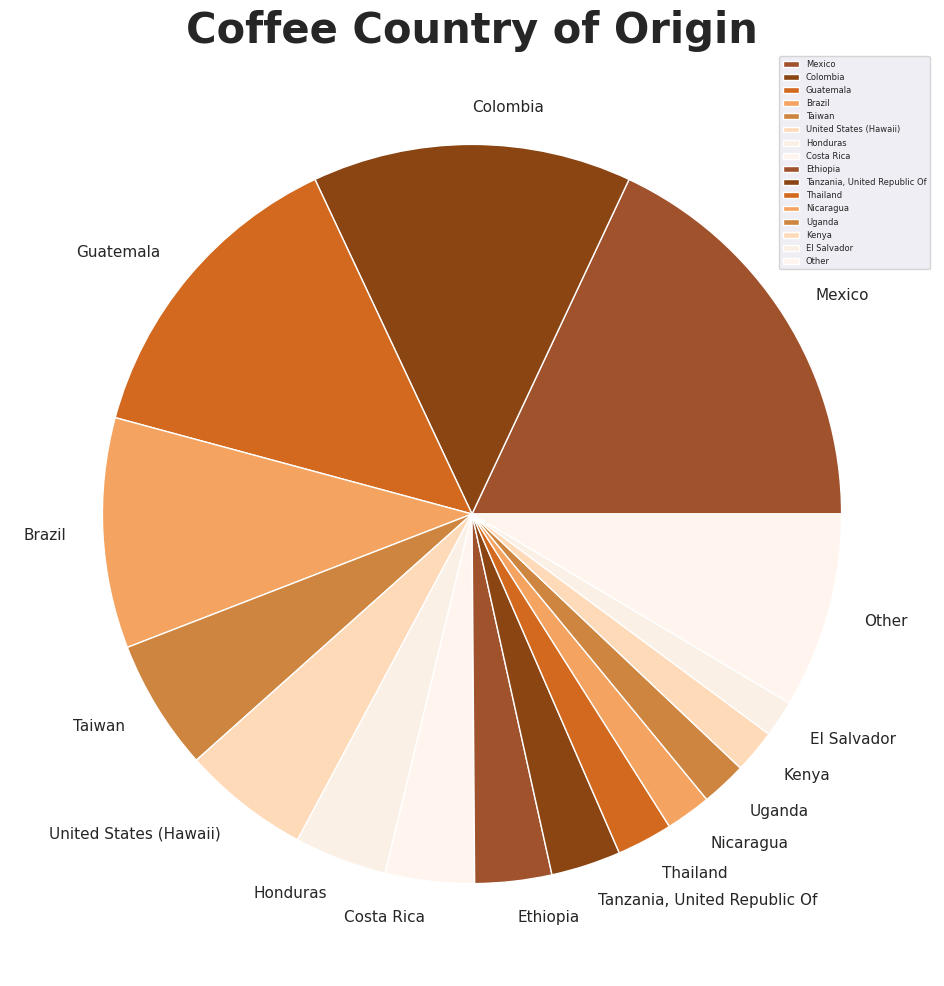

In [182]:
countries = df.copy()
countries.drop(countries.columns.difference(['Country.of.Origin']), 1, inplace=True)
country_counts = countries.value_counts()
country_counts = pd.DataFrame(country_counts)
country_counts = country_counts.reset_index()
country_counts.columns=['Origin', 'Count']

#the top 5
country_counts2 = country_counts[:15].copy()

#others
new_row = pd.DataFrame(data = {
    'Origin' : ['Other'],
    'Count' : [country_counts['Count'][15:].sum()]
})

#combining top 5 with others
pie = pd.concat([country_counts2, new_row])

sns.set(rc={"figure.figsize":(40, 12)})

#define colors
colors = ['sienna', 'saddlebrown', 'chocolate', 'sandybrown', 'peru', 'peachpuff', 'linen', 'seashell']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

pie_chart = pie.plot(kind = 'pie', y = 'Count', labels = pie['Origin'], colors=colors, autopct=autopct_format(pie))
pie_chart.set_title('Coffee Country of Origin', fontdict={'size': 30, 'weight': 'bold'})
plt.legend(loc='upper right', prop={'size': 6})
plt.ylabel(None)
plt.show()

# Predict average production over next few years

In [41]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop country column
    df = df.drop('country', axis=1)
    
    # Split df into X and y
    y = df['total_production']
    X = df.drop('total_production', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [42]:
#define our train set
X_train, X_test, y_train, y_test = preprocess_inputs(data)

KeyError: "['country'] not found in axis"

In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
#define algorithm for our model then fit it on the train set
model = RandomForestRegressor()
model.fit(X_train, y_train)
print("Model trained.")

In [ ]:
#Create predicion models
y_pred = model.predict(X_test)

#Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
print("RMSE: {:.2f}".format(rmse))

#Calculate R^2 model, which demonstrates how much better your model is than the mean model
r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
print("R^2: {:.5f}".format(r2))

In [ ]:
!voila "Coffee_Analysis.ipynb" --template=gridstack